In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor

# Alur kerja AI
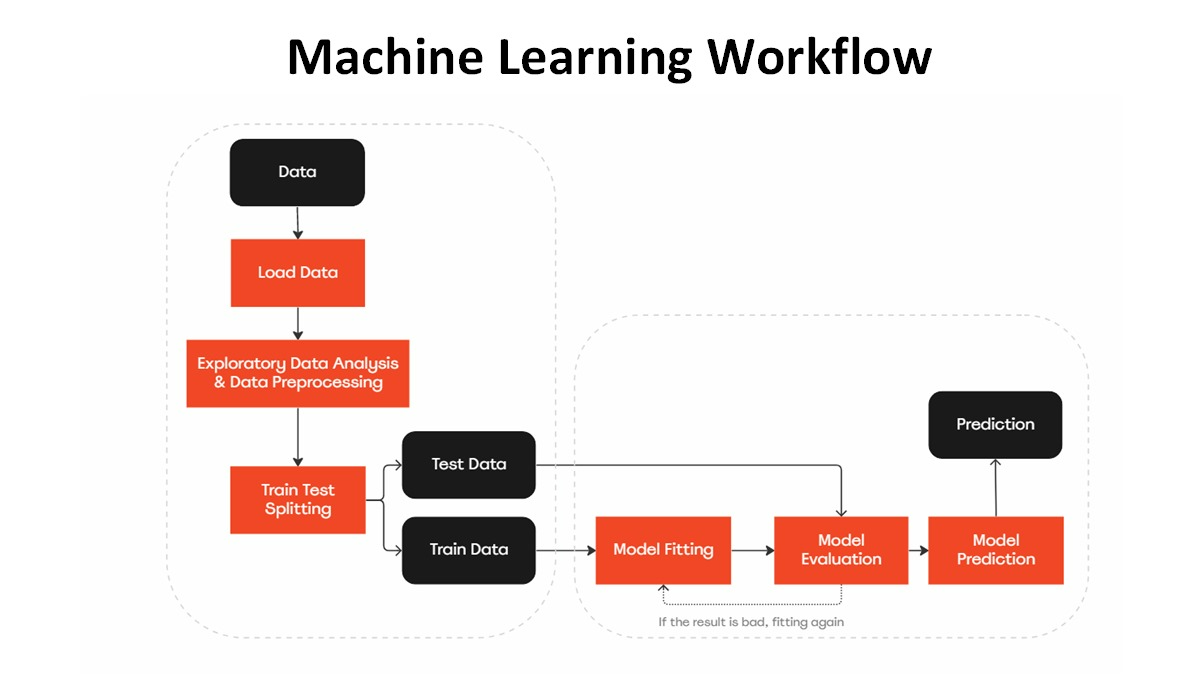

In [13]:
# load the data
file_path = '../Data/Raw/AIK_dataset_1_raw.csv'
data = pd.read_csv(file_path)

In [14]:
# Explore the dataset
# print(data.head())
print(data.info())
# print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   brand                          193 non-null    object 
 1   fuel-type                      193 non-null    object 
 2   aspiration                     193 non-null    object 
 3   num-of-doors                   193 non-null    object 
 4   body-style                     193 non-null    object 
 5   drive-wheels                   193 non-null    object 
 6   engine-location                193 non-null    object 
 7   wheel-base                     193 non-null    float64
 8   length                         193 non-null    float64
 9   width                          193 non-null    float64
 10  height                         193 non-null    float64
 11  curb-weight                    193 non-null    int64  
 12  engine-type                    193 non-null    obj

In [15]:
# Preprocessing
# Handle missing values
data = data.drop(columns=['clearance-volume-per-cylinder'])
data.head(10)

,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.470000,3.436644,9.00000,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.470000,3.436644,9.00000,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152.0,mpfi,3.048853,3.470000,9.00000,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109.0,mpfi,3.190000,3.400000,10.00000,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136.0,mpfi,3.190000,3.400000,8.00000,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136.0,mpfi,3.190000,3.400000,8.50000,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136.0,mpfi,3.190000,3.400000,8.50000,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136.0,mpfi,3.190000,3.400000,8.50000,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131.0,mpfi,3.130000,3.400000,8.30000,140,5500,17,20,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108.0,mpfi,3.500000,2.806324,5.46875,101,5800,23,29,16430


In [16]:
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [17]:
# Split data into features and target
X = data.drop('price', axis=1)  # Replace 'price' with your target column
y = data['price']

In [18]:
# Scale features (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

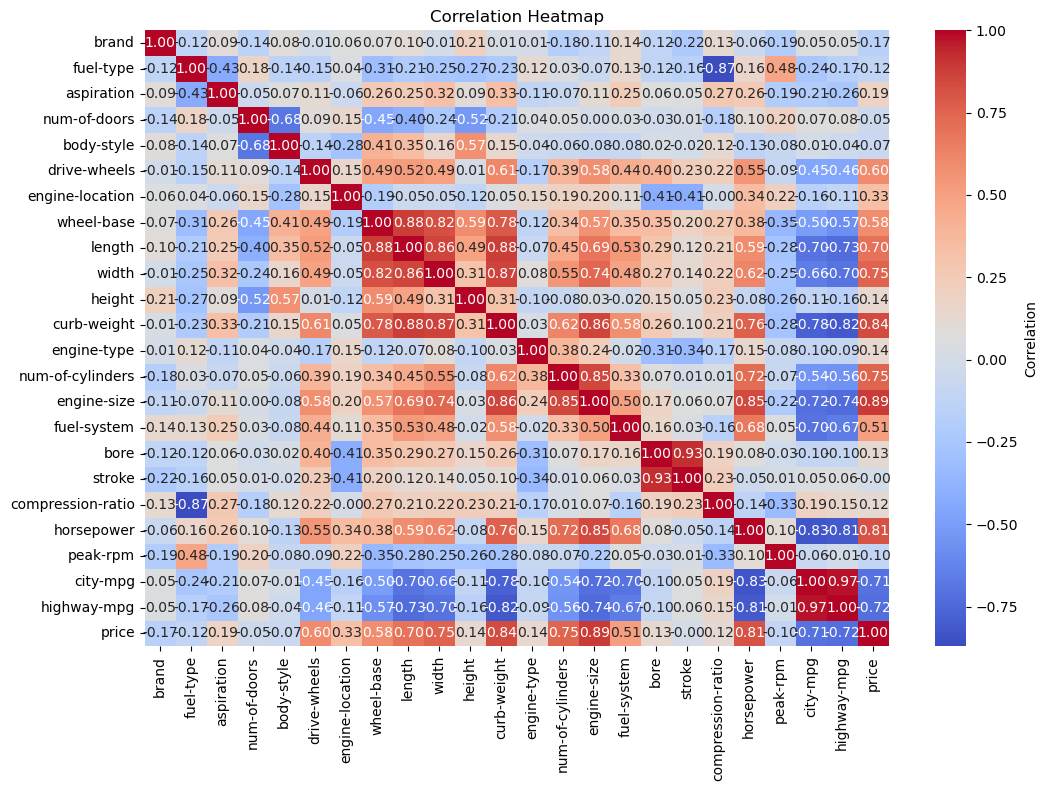

In [19]:
# Compute the correlation matrix
correlation_matrix = data.corr()
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation'})

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the model (XGBoost)
model = XGBRegressor(
    random_state=42,
    n_estimators=100,     # Number of boosting rounds
    learning_rate=0.1,    # Step size shrinkage
    max_depth=3,          # Maximum tree depth
    subsample=0.8,        # Fraction of samples used for training
    colsample_bytree=0.8  # Fraction of features used for each tree
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1480.952386318109
R² Score: 0.9363046884536743


In [23]:
# Save predictions
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('../Data/Processed/Processed_Grad_Boosting.csv', index=False)

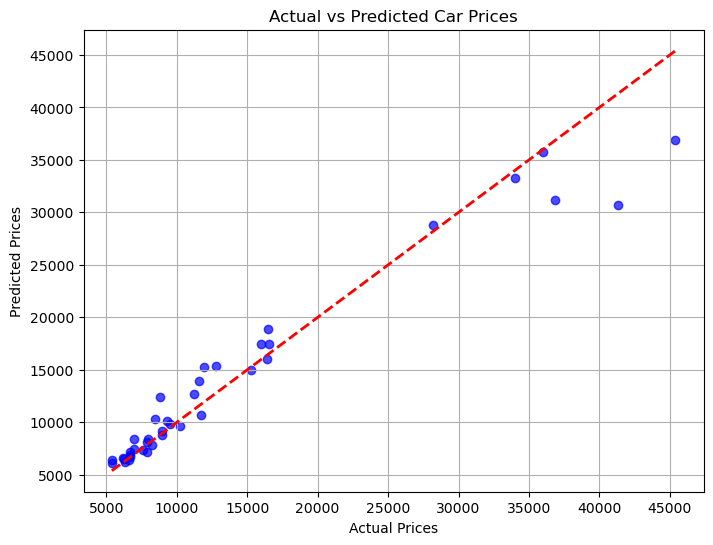

In [24]:
# visualisation
plt.figure(figsize=(8, 6))
plt.scatter(output['Actual'], output['Predicted'], alpha=0.7, color='blue')
plt.plot([output['Actual'].min(), output['Actual'].max()],
         [output['Actual'].min(), output['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()